In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(palette='colorblind')
import os.path, sys

In [4]:
forcefield = sys.argv[1]
surface_pressure = sys.argv[2]

contrasts = ['d13acmw', 'd13d2o', 'hd2o', 'd70acmw', 'd70d2o', 'd83acmw', 'd83d2o']

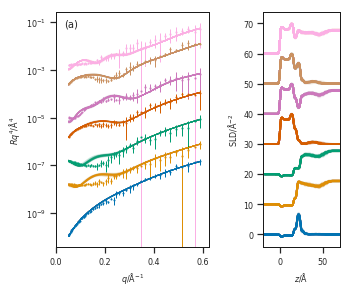

In [10]:
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.facecolor'] = 'w'
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.top'] = False
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.facecolor'] = [1,1,1]
mpl.rcParams['legend.framealpha'] = 0.75
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['axes.edgecolor'] = 'k'

plt.figure(figsize=(5, 25/6))
gs = mpl.gridspec.GridSpec(1, 2, width_ratios=[2, 1])
colors = ["#0173B2", "#DE8F05", "#029E73", "#D55E00", "#CC78BC", "#CA9161", "#FBAFE4"]
markers = ['o', 's', 's', 'o', 's', 'o', 's']
linesstyles = ['-', ':', ':', '-', ':', '-', ':']
ax = plt.subplot(gs[0])
for k, b in enumerate(contrasts):
    data = np.loadtxt('../../output/simulation/{}_{}_{}_ref.txt'.format(b, forcefield, surface_pressure), unpack=True)
    plt.errorbar(data[0], data[1]*10**k, yerr=data[2]*10**k, marker=markers[k], ls='', zorder=1, 
                 c=colors[k], markersize=1, elinewidth=1)
    to_plot = np.random.randint(3, data.shape[0], size=100)
    for j in to_plot:
        ax.plot(data[0], data[j]*10**k, c=colors[k], lw=1, ls='-', alpha=0.05)
ax.set_yscale('log')
ax.set_xlim([0, 0.625])
ax.set_ylabel('$Rq^4$/Å$^{4}$')
ax.set_xlabel('$q$/Å$^{-1}$')
if forcefield == 'slipids':
    text = '(b)'
if forcefield == 'berger':
    text = '(c)'
if forcefield == 'martini':
    text = '(d)'
ax.text(0.1, 0.95, text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax = plt.subplot(gs[1])
for k, b in enumerate(contrasts):
    data = np.loadtxt('../../output/simulation/{}_{}_{}_sld.txt'.format(b, forcefield, surface_pressure), unpack=True)
    to_plot = np.random.randint(1, data.shape[0], size=100)
    for j in to_plot:
        x2 = np.linspace(-20, data[0].min(), 100)
        x = np.append(x2, data[0])
        y2 = np.zeros_like(x2)
        y = np.append(y2, data[j])
        if x.max() < 70:
            x3 = np.linspace(x.max(), 71, 100)
            y3 = np.ones_like(x3) * y[-1]
            x = np.append(x, x3)
            y = np.append(y, y3)
        x = x[np.where(x < 70)]
        y = y[np.where(x < 70)]
        ax.plot(x, y*10 + 10 * k, c=colors[k], lw=2, ls='-', alpha=0.05)
ax.set_ylabel(r'SLD/Å$^{-2}$')
ax.set_xlabel(r'$z$/Å')
ax.set_xlim([-20, 70])
plt.tight_layout()
plt.savefig('../../reports/figures/sim_{}_{}.pdf'.format(forcefield, surface_pressure))